In [57]:
import torch
import torch.nn as nn
import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Creating data using sklearn

In [58]:
data = make_regression(n_samples = 1000,                 #number of samples
                                      n_features = 3,            #number of features
                                      n_informative = 3,         #number of useful features

                                      random_state = 42)            #set for same data points for each run



In [59]:
type(data)

tuple

In [60]:
len(data)

2

In [61]:
X = data[0]

In [62]:
y = data[1]

In [63]:
X.shape

(1000, 3)

# Transforming Data features into Data Frames with columns Research, Salaries, Infrastructure and Expenditures

In [64]:
Research = X[:,0]

In [65]:
Salaries = X[:,1]

In [66]:
Infrastructure = X[:,2]

In [67]:
# Scale Research from 0 to 2000
Research = np.interp(Research, (Research.min(), Research.max()), (0, 2000))

In [ ]:
Research

In [68]:
Salaries = np.interp(Salaries, (Salaries.min(), Salaries.max()), (0, 1500))

In [69]:
Infrastructure = np.interp(Infrastructure, (Infrastructure.min(), Infrastructure.max()), (0, 2500))

In [ ]:
y = data[1]
y.shape

In [ ]:
y

In [70]:
y = np.interp(y, (y.min(), y.max()), (6000, 20000))

In [71]:
Expenditures = y

In [72]:
df = pd.DataFrame(index = ['Research', 'Salaries','Infrastructure', 'Expenditures'],
                        data = [Research, Salaries, Infrastructure, Expenditures]).T


In [73]:
df

,Research,Salaries,Infrastructure,Expenditures
0,721.857251,613.903942,765.705784,10160.329845
1,469.381222,613.054782,795.516457,9906.531892
2,1077.203847,999.031362,892.341111,13652.741259
3,883.301188,427.943743,935.641612,9755.080727
4,1258.683826,945.261280,1371.053555,15239.327596
...,...,...,...,...
995,944.144896,662.449234,1699.288797,14085.407676
996,835.747970,637.154467,626.099384,9981.171495
997,1065.151976,646.862827,1433.367330,13213.698646
998,547.326065,900.664293,1179.932777,13274.638267


# Visualize and Inspect each feature

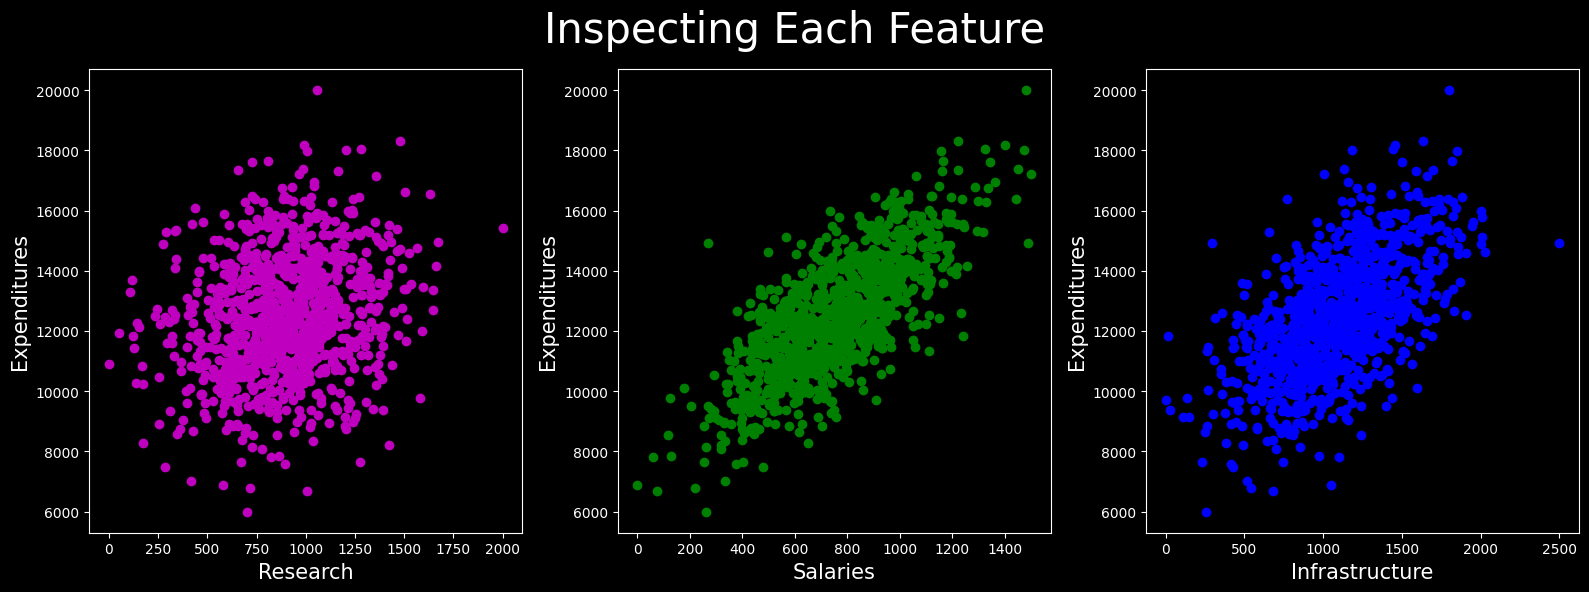

In [74]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
plt.suptitle('Inspecting Each Feature', fontsize = 30)

axes[0].plot(df['Research'],df['Expenditures'],'mo')
axes[0].set_ylabel("Expenditures", fontsize = 15)
axes[0].set_xlabel("Research", fontsize = 15)

axes[1].plot(df['Salaries'],df['Expenditures'],'go')
axes[1].set_ylabel("Expenditures", fontsize = 15)
axes[1].set_xlabel("Salaries", fontsize = 15)

axes[2].plot(df['Infrastructure'],df['Expenditures'],'bo')
axes[2].set_ylabel("Expenditures", fontsize = 15)
axes[2].set_xlabel("Infrastructure", fontsize = 15)

plt.tight_layout();

In [75]:
X = df.iloc[:,:-1].values

In [ ]:
X

In [76]:
y = df.iloc[:,-1].values

In [77]:
y = y.reshape(-1,1)

# Splitting data into test and train

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [79]:
X_test.shape

(200, 3)

In [80]:
X_train.shape

(800, 3)

In [ ]:
y_train.shape

In [ ]:
X_train

# Data Standardization

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Transform to Pytorch Tensors

In [82]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create Neural Network for Multiple Regression

In [83]:
model = nn.Sequential(
          nn.Linear(3,1),
)

model

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
)

In [84]:
learningRate = 0.01
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learningRate)

In [85]:
epochs = 1001
losses = torch.zeros(epochs)

for epoch in range(epochs):
    ypred = model(X_train)
    loss = lossfunc(ypred,y_train)
    losses[epoch] = loss

    if (epoch % 100) == 0:
     print(f'epochs : {epoch} loss : {loss.detach(): 1.2f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs : 0 loss :  159718032.00
epochs : 100 loss :  2826662.75
epochs : 200 loss :  50205.34
epochs : 300 loss :  896.11
epochs : 400 loss :  16.12
epochs : 500 loss :  0.29
epochs : 600 loss :  0.01
epochs : 700 loss :  0.00
epochs : 800 loss :  0.00
epochs : 900 loss :  0.00
epochs : 1000 loss :  0.00


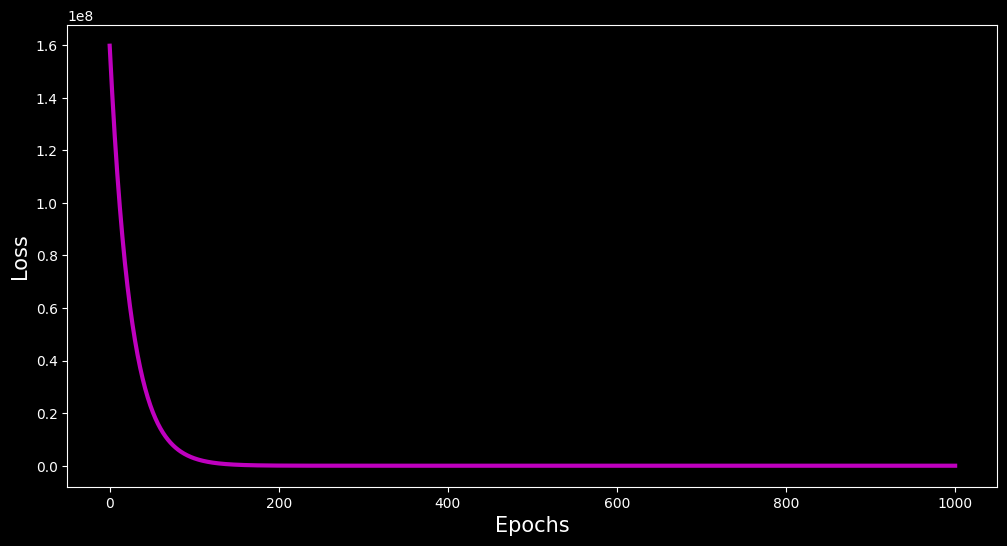

In [86]:
plt.figure(figsize =(12,6))
plt.plot(np.arange(epochs), losses.detach(), 'm', lw = 3)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

# Weight and Bias Values

In [87]:
print(model[0].weight.detach().numpy())
print(model[0].bias.detach().numpy())

[[ 409.5429 1557.3359 1229.1144]]
[12483.427]


# Testing and evaluating the model

In [88]:
y_pred = model(X_test)

In [89]:
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()

In [90]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 0.024490846
MAE: 0.1548689
R2: 0.9999999998600717


# Further Evaluating the model

In [91]:
test_data = X_test[113,:].reshape(1,3)
test_data.shape

torch.Size([1, 3])

In [92]:
test_label = y_test[113]
test_label

array([11080.39], dtype=float32)

In [93]:
test_label = torch.tensor(test_label, dtype=torch.float32)

In [94]:
y_t = model(test_data)

In [95]:
y_t = y_t.detach().numpy()
test_label = test_label.detach().numpy()

In [96]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_label, y_t)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(test_label, y_t)))
print('R2:', metrics.r2_score(test_label, y_t))

RMSE: 0.022460938
MAE: 0.14986974
R2: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# Sequential Method of Creating Neural Network

In [ ]:
model = nn.Sequential(
          nn.Linear(3,1),
)

model

# Creating Neural Network Using Class

In [97]:
class NN_Reg(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer = nn.Linear(3,1)


  # Forward pass

  def forward(self,x):

  # Passing your data through the layer

    x = self.layer(x)
    return x


In [98]:
# Create Model Instance
model2 = NN_Reg()

In [99]:
learningRate = 0.01
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(),lr = learningRate)

In [100]:
epochs = 1001
losses = torch.zeros(epochs)

for epoch in range(epochs):
    ypred = model2(X_train)
    loss = lossfunc(ypred,y_train)
    losses[epoch] = loss

    if (epoch % 100) == 0:
     print(f'epochs : {epoch} loss : {loss.detach(): 1.2f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs : 0 loss :  159727680.00
epochs : 100 loss :  2826833.00
epochs : 200 loss :  50207.48
epochs : 300 loss :  896.12
epochs : 400 loss :  16.12
epochs : 500 loss :  0.29
epochs : 600 loss :  0.01
epochs : 700 loss :  0.00
epochs : 800 loss :  0.00
epochs : 900 loss :  0.00
epochs : 1000 loss :  0.00


In [101]:
y_t_2 = model2(X_test)

In [102]:
y_t_2 = y_t_2.detach().numpy()

In [103]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_t_2)))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_t_2)))
print('R2:', metrics.r2_score(y_test, y_t_2))

RMSE: 0.024490846
RMSE: 0.1548689
R2: 0.9999999998600717
